In [1]:
from text3d2video.artifacts.animation_artifact import AnimationArtifact

anim_tag = "cat_rotation_90:latest"
animation = AnimationArtifact.from_wandb_artifact_tag(anim_tag, download=True)

frames = animation.frame_nums(5)
cameras = animation.cameras(frames)
meshes = animation.load_frames(frames)

wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb:   2 of 2 files downloaded.  


In [2]:
import torch
from diffusers import ControlNetModel, DPMSolverMultistepScheduler
from text3d2video.pipelines.controlnet_pipeline import ControlNetPipeline
from text3d2video.ipython_utils import display_ims

sd_repo = "runwayml/stable-diffusion-v1-5"
controlnet_repo = "lllyasviel/control_v11f1p_sd15_depth"

dtype = torch.float16
device = torch.device("cuda")

controlnet = ControlNetModel.from_pretrained(
    controlnet_repo, torch_dtype=torch.float16
).to(device)

pipe = ControlNetPipeline.from_pretrained(
    sd_repo, controlnet=controlnet, torch_dtype=dtype
).to(device)

pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

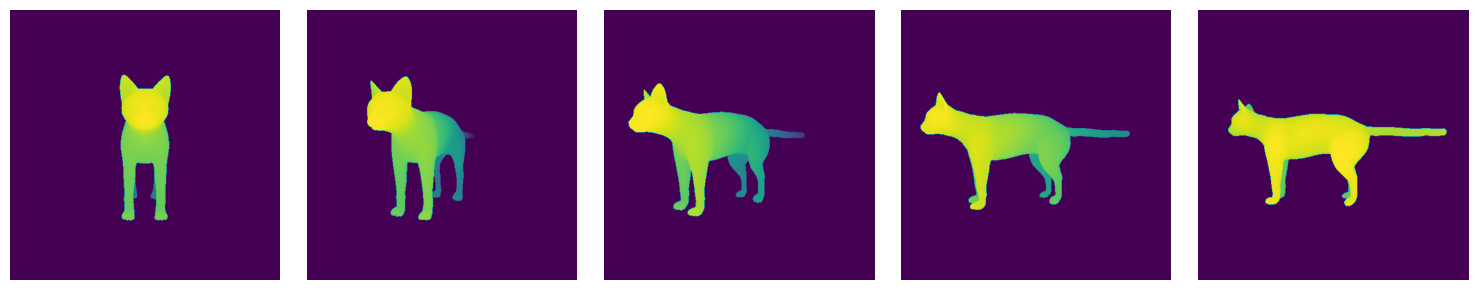

In [3]:
from text3d2video.rendering import render_depth_map

depth_maps = render_depth_map(meshes, cameras)
display_ims(depth_maps, 3)

  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:02<00:00,  4.86it/s]


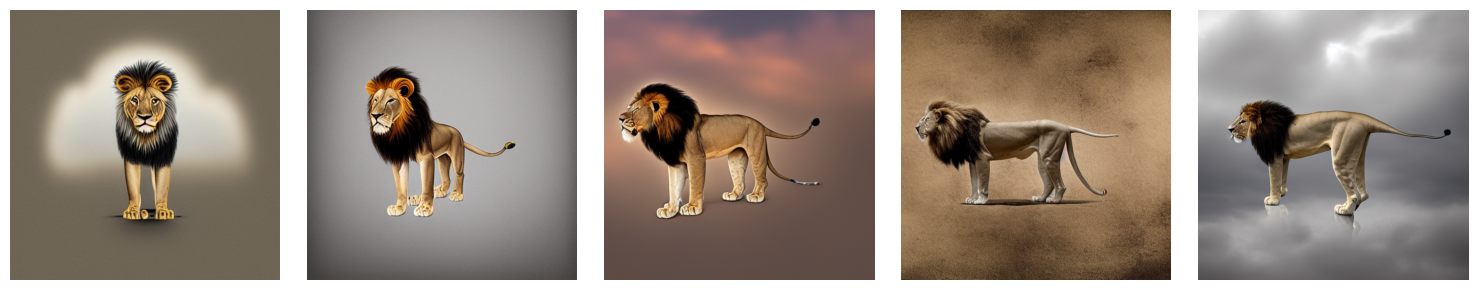

: 

In [ ]:
prompt = "Lion"

n = len(depth_maps)
images = pipe(
    [prompt] * n,
    depth_maps,
    guess_mode=True,
    num_inference_steps=10,
    guidance_scale=7.5,
    controlnet_conditioning_scale=1,
)

display_ims(images, 3)